_This notebook solves various models for different parameter values and plots the associated welfare gains comparing competetitive equilibrium and planner equilibrium solutions._

### Computation steps

1 __Define various scenarios__

_Required inputs:_
- `modfile`: name of the model file. See _`model_files`_ folders. Each file includes the model equations, parameters, calibrations, exogenous process. 

- `freeparam`: name of the free parameter 

- `range`: range of this parameter (starting value, end value, number of grid points)

_Optional inputs:_

- `fixedparam`: name of the parameter (which will be different than the baseline calibration) that you want to change and plot (as we do for the last model with translog preferences where in first case $\varphi = 0.25$ and $\varphi = 5$ in the second)

2 __Compute welfares__ calling the `"BGM_solver"` module. Solve the model for each scenario 

`BGM_solver.py` 

3 __Export results__ in a table (also export to excel)


Press `ctrl+enter`to run each code block one after the other 


## Define scenarios

In [34]:
# Define the various scenarios/cases 
N = 100 #Number of grid points for the free parameter range

experiments = [
    ### Baseline model
    dict(modfile='ces', freeparam='xi', range=(0.2,1.0,N)),
    dict(modfile='exponential', freeparam='alpha', range=(0.1,10,N)),
    dict(modfile='translog',  freeparam='sigma', range=(0.1,10,N)),
    
    ### Elastic labor
    dict(modfile ='cesds_EL', freeparam='varphi', range=(0.2,10,N)),
    dict(modfile ='cesds_EL', freeparam='mu', range=(1.1,2,N)),    
    
    ### Endogenous investment (inelastic labour)
    dict(modfile ='cesds_EI', freeparam='zeta', range=(0.3,0.9,N)),
    dict(modfile ='cesds_EI', freeparam='mu', range=(1.1,2,N)),
    
    ### Elastic labor and endogenous investment 
    dict(modfile ='translog_ELEI', freeparam='sigma', range=(0.23040863317764562,10,N), fixedparam = 'varphi', value=0.25),
    dict(modfile ='translog_ELEI', freeparam='sigma', range=(0.23040863317764562,10,N), fixedparam = 'varphi', value=5) ,
    
]

_Note: For the general model with translog preferences, `'0.23040863317764562'` is the smallest exact value for $\varphi$ = 0.25  at which welfare for competitive equilibrium is larger than 0. So we choose this inital value for the graphs, at points below that, welfare gains are infinite so we can't plot them_

## Compute Welfares

In [35]:
# Serial evaluation -> for each case compute ce,po and welfare gains
from BGM_solver import compute_case
all_welfares = [compute_case(exp) for exp in experiments];

In [36]:
# Import the python library for plots
from matplotlib import pyplot as plt 

#Import the python library for tables
import pandas

# Create the table for all paramter values, ce and po welfare, gains and export to excel
df = pandas.concat(all_welfares, axis=1)
df.to_excel('output/welfare_gains.xls')

# Print results
df

,translog_ELEI_varphi025_sigma,translog_ELEI_varphi025_sigma_po,translog_ELEI_varphi025_sigma_ce,translog_ELEI_varphi025_sigma_gain,translog_ELEI_varphi5_sigma,translog_ELEI_varphi5_sigma_po,translog_ELEI_varphi5_sigma_ce,translog_ELEI_varphi5_sigma_gain
0,0.230409,0.455683,0.331413,37.497053,0.230409,0.994237,0.905994,9.739854
1,1.315919,0.659848,0.599962,9.981526,1.315919,1.492088,1.447317,3.093354
2,2.401429,0.707160,0.661358,6.925446,2.401429,1.604956,1.571134,2.152709
3,3.486939,0.731314,0.692750,5.566753,3.486939,1.662147,1.633864,1.731095
4,4.572449,0.746660,0.712701,4.764783,4.572449,1.698328,1.673530,1.481764
5,5.657959,0.757534,0.726838,4.223232,5.657959,1.723892,1.701546,1.313304
6,6.743470,0.765767,0.737539,3.827279,6.743470,1.743206,1.722704,1.190119
7,7.828980,0.772284,0.746009,3.522124,7.828980,1.758471,1.739421,1.095184
8,8.914490,0.777612,0.752931,3.277960,8.914490,1.770934,1.753067,1.019231
9,10.000000,0.782075,0.758729,3.077035,10.000000,1.781363,1.764482,0.956736


## Make plots

### General C.E.S.

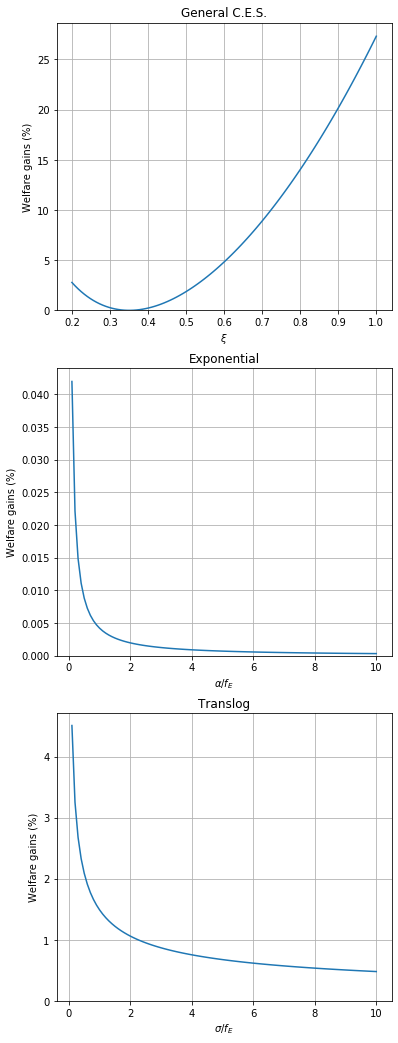

In [28]:
fig = plt.figure(figsize=(6,18))

plt.subplot(311)
plt.plot(df['ces_xi'],df['ces_xi_gain'])
plt.ylabel('Welfare gains (%)')
plt.xlabel("$\\xi$")
yl = plt.ylim()
plt.ylim(0,yl[1])
plt.title("General C.E.S.")
plt.grid()
# xlim(4,8)
# ylim(0,0.2)

plt.subplot(312)
plt.plot(df['exponential_alpha'],df['exponential_alpha_gain'])
plt.grid()
yl = plt.ylim()
plt.ylim(0,yl[1])
plt.title("Exponential")
plt.xlabel("$\\alpha/ f_{E}$")
plt.ylabel('Welfare gains (%)')
plt.subplot(313)
plt.plot(df['translog_sigma'],df['translog_sigma_gain'])
plt.grid()
yl = plt.ylim()
plt.ylim(0,yl[1])
plt.title("Translog")
plt.xlabel("$\\sigma/ f_{E}$")
plt.ylabel('Welfare gains (%)')

plt.savefig('output/BGM_welfare_gains.png')
plt.savefig('output/BGM_welfare_gains.pdf')
plt.savefig('output/BGM_welfare_gains.svg')


### C.E.S.-D.S. with elastic labor

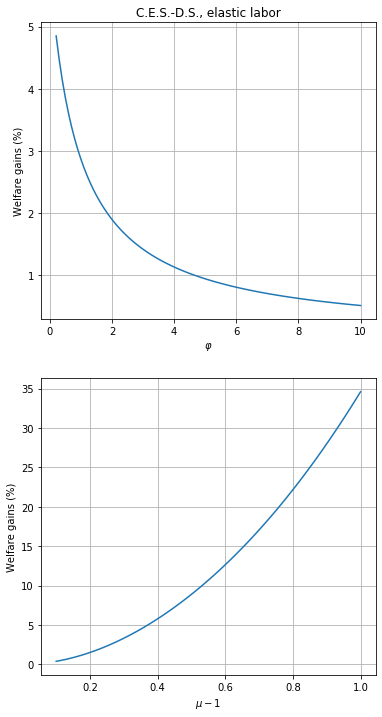

In [31]:
fig = plt.figure(figsize=(6,12))

plt.subplot(211)
plt.plot(df['cesds_EL_varphi'],df['cesds_EL_varphi_gain'])
plt.ylabel('Welfare gains (%)')
plt.xlabel("$\\varphi$")
#yl = plt.ylim()
#plt.ylim(0,yl[1])
plt.title('C.E.S.-D.S., elastic labor')
plt.grid()
# xlim(4,8)
# ylim(0,0.2)

plt.subplot(212)
plt.plot(df['cesds_EL_mu']-1,df['cesds_EL_mu_gain'])
plt.ylabel('Welfare gains (%)')
plt.xlabel("$\\mu-1$")
#yl = plt.ylim()
#plt.ylim(0,yl[1])
#plt.title("C.E.S.-DS, Elastic Labor")
plt.grid()
# xlim(4,8)
# ylim(0,0.2)



plt.savefig('output/BGM_welfare_gains_EL.png')
plt.savefig('output/BGM_welfare_gains_EL.pdf')
plt.savefig('output/BGM_welfare_gains_EL.svg')

### C.E.S.-D.S. with endogenous Investment (inelastic Labor)

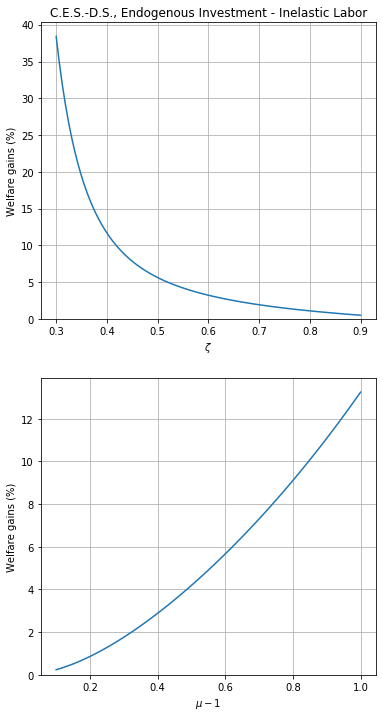

In [32]:
fig = plt.figure(figsize=(6,12))


plt.subplot(211)
plt.plot(df['cesds_EI_zeta'],df['cesds_EI_zeta_gain'])
plt.ylabel('Welfare gains (%)')
plt.xlabel("$\\zeta$")
yl = plt.ylim()
plt.ylim(0,yl[1])
plt.title("C.E.S.-D.S., Endogenous Investment - Inelastic Labor")
plt.grid()
# xlim(4,8)
# ylim(0,0.2)


plt.subplot(212)
plt.plot(df['cesds_EI_mu']-1,df['cesds_EI_mu_gain'])
plt.ylabel('Welfare gains (%)')

plt.xlabel("$\\mu-1$")
yl = plt.ylim()
plt.ylim(0,yl[1])
#plt.title("C.E.S.-DS, Endogenous Investment - Inelastic Labor")
plt.grid()
# xlim(4,8)
# ylim(0,0.2)

plt.savefig('output/BGM_welfare_gains_EI.png')
plt.savefig('output/BGM_welfare_gains_EI.pdf')
plt.savefig('output/BGM_welfare_gains_EI.svg')

### General model with endogenous Investment ans elastic labor (translog preferences)

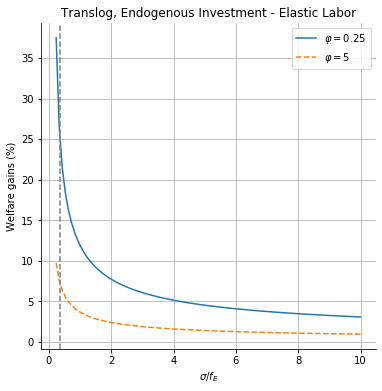

In [33]:
fig,ax = plt.subplots(figsize=(6,6))
plt.plot(df['translog_ELEI_varphiL_varphi025_sigma'],df['translog_ELEI_varphiL_varphi025_sigma_gain'], label="$\\varphi = 0.25$")
plt.plot(df['translog_ELEI_varphiH_varphi5_sigma'],df['translog_ELEI_varphiH_varphi5_sigma_gain'], label="$\\varphi = 5$", linestyle='--', )
plt.ylabel('Welfare gains (%)')
plt.xlabel("$\\sigma/ f_{E}$")
#yl = plt.ylim()
#plt.ylim(0,yl[1])
plt.title("Translog, Endogenous Investment - Elastic Labor")
plt.grid()
plt.legend(loc='best')

#plt.xlim(0,10)
#plt.ylim(0,41)

# Exact point where sigma = 0.35 to show
# sigma = 0.35, phi=0.25 --> welfare gains(%) 25.121546	
# sigma = 0.35, phi=5 --> welfare gains(%) 7.28467
plt.axvline(x=0.35, linestyle='--', color='gray')

#remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('output/BGM_welfare_gains_general_model.png')
plt.savefig('output/BGM_welfare_gains_general_model.pdf')
plt.savefig('output/BGM_welfare_gains_general_model.svg')